In [108]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import joblib
import tensorflow as tf

In [109]:
# Crear un rango de temperaturas en Kelvin
kelvin_temps = np.array([0,100,200,300,400,500,600], dtype=float)
fahrenheit_temps_from_kelvin = (kelvin_temps - 273.15) * 9/5 + 32

# Crear el DataFrame
new_temperature_data_practice = pd.DataFrame({
    'Kelvin': kelvin_temps,
    'Fahrenheit': fahrenheit_temps_from_kelvin
})

In [110]:
oculta1 = tf.keras.layers.Dense(units=3,input_shape=[1])
salida  = tf.keras.layers.Dense(units=1)
modelo  = tf.keras.Sequential([oculta1,salida])

In [111]:
modelo.compile(optimizer = tf.keras.optimizers.Adam(0.1),loss='mean_squared_error')

In [112]:
print('Comenzando entrenamiento')
historial = modelo.fit(fahrenheit_temps_from_kelvin,kelvin_temps,epochs=1000,verbose=False)
print('Modelo entrenado')

Comenzando entrenamiento
Modelo entrenado


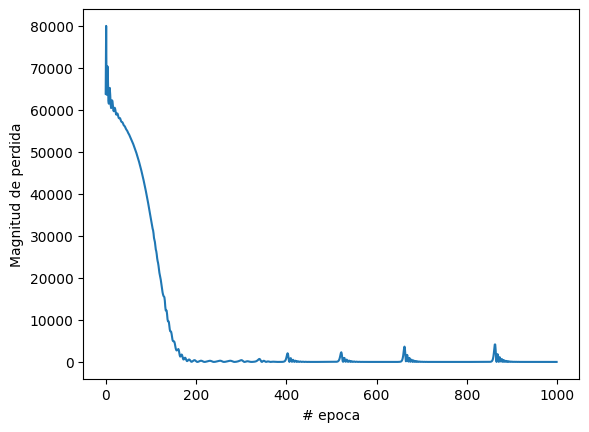

In [113]:
plt.xlabel('# epoca')
plt.ylabel('Magnitud de perdida')
plt.plot(historial.history['loss'])

In [114]:
print('Vamos a hacer una predicción')
resultado = modelo.predict(np.array([[200.0]]))  # corregir esta parte
print('El resultado es ' + str(resultado[0][0]) + ' Fahrenheit') 

Vamos a hacer una predicción
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
El resultado es 366.45294 Fahrenheit


In [115]:
print('Variables internas del modelo')
print(oculta1.get_weights())
print(salida.get_weights())

Variables internas del modelo
[array([[-0.04115512, -1.0442771 ,  0.46784142]], dtype=float32), array([ 27.101221, -17.807085, -20.410797], dtype=float32)]
[array([[ 3.8173184],
       [-2.6599157],
       [-4.4142838]], dtype=float32), array([14.454181], dtype=float32)]
